In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Data
from tensorflow.keras.datasets import fashion_mnist

(x_train_set, y_train_set), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train_set.shape, y_train_set.shape, x_test.shape, y_test. shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

9


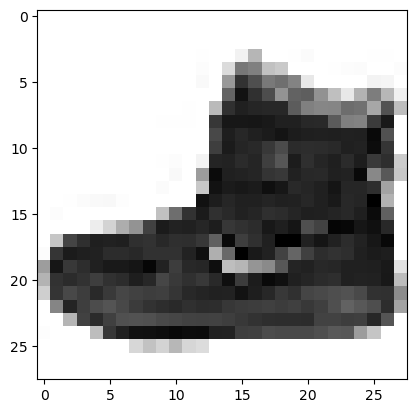

In [4]:
i = 0
print(y_train_set [i])
plt.imshow(x_train_set[i], cmap='binary') 
plt.show()

In [5]:
# Split data
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train_set, 
                                                      y_train_set, 
                                                      random_state=1)

In [6]:
print(x_train[0])
x_train2 = x_train / 255.0
print(x_train2[0])

[[  0   0   0   0   0   0   1   0   0   0   0  63   0   0   0   0   0  22
   10   0   0   0   3   0   0   0   0   0]
 [  0   0   0   1   0   1   0   0   0 113 226 247 216 185 147 146 207 235
  210 136  15   0   0   2   0   0   0   0]
 [  0   0   0   0   2   0   0 138 221 234 222 218 243 255 255 255 255 223
  218 235 223 172   0   0   4   0   0   0]
 [  0   0   0   2   0   0 205 239 215 212 214 206 213 216 220 220 216 213
  218 214 212 239 213   0   0   0   0   0]
 [  0   0   0   0   0 163 236 208 215 216 217 215 215 215 209 212 215 215
  215 219 218 206 234 100   0   0   0   0]
 [  0   0   0   0  47 234 215 215 215 215 214 214 215 214 215 216 216 215
  215 215 217 215 223 232   0   0   0   0]
 [  0   0   0   0 189 231 222 214 214 215 215 215 215 215 214 215 216 216
  216 218 217 218 219 238  78   0   0   0]
 [  0   0   0   0 217 216 229 225 215 216 214 215 215 214 214 215 215 216
  217 218 217 221 225 230 194   0   0   0]
 [  0   0   0 130 235 209 225 233 211 214 216 216 217 216 214 21

In [7]:
# Preprocessing
x_train = x_train / 255.0
x_valid =x_valid / 255.0
x_test = x_test / 255.0
print(x_train.shape, x_valid.shape, x_test.shape)

(45000, 28, 28) (15000, 28, 28) (10000, 28, 28)


In [8]:
# Build Model
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten, Dense

In [9]:
keras.backend.clear_session()
np. random. seed (1)
tf.random.set_seed(1)

In [10]:
model = Sequential([
    #第一層：將 28*28攤平成一維度
    Flatten(input_shape=x_train.shape[1:]),
    #第二層
    Dense (units=300, activation='relu'),
    Dense (units=200, activation='relu'),
    Dense (units=100, activation='relu'),
    #輸出層：10類別，10個神經元
    Dense (units=10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 316810 (1.21 MB)
Trainable params: 316810 (1.21 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 以下3種opt寫法

In [12]:
# Compile01
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer='sgd', 
               metrics= ['accuracy'])

In [13]:
# Compile02
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer=opt, 
               metrics= ['accuracy'])

In [14]:
# Compile03
model.compile(loss='sparse_categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
               metrics= ['accuracy'])

In [15]:
# Train
train = model.fit(x_train, y_train,
                   epochs=20, 
                  validation_data=(x_valid, y_valid))

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.7837 - accuracy: 0.7393 - val_loss: 0.6349 - val_accuracy: 0.7751
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.4972 - accuracy: 0.8256 - val_loss: 0.5102 - val_accuracy: 0.8166
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4461 - accuracy: 0.8420 - val_loss: 0.4568 - val_accuracy: 0.8355
Epoch 4/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.4153 - accuracy: 0.8522 - val_loss: 0.4162 - val_accuracy: 0.8503
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3939 - accuracy: 0.8604 - val_loss: 0.9604 - val_accuracy: 0.6727
Epoch 6/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3767 - accuracy: 0.8672 - val_loss: 0.5820 - val_accuracy: 0.8066
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3603 - accuracy: 0.8710 - val_loss: 0.3873 - val_accuracy:

In [ ]:
# Evaluate
model.evaluate(x_test, y_test)